# Models
## Linear Regression
Linear Regression models are models which predict a continuous label. The goal is to produce a model that represents the ‘best fit’ to some observed data, according to an evaluation criterion we choose.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from numpy.random import normal as rnorm
from statsmodels.stats.outliers_influence import OLSInfluence

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

In [ ]:
file = 'data/kaggle_house_price.csv'
df = pd.read_csv(file)
df.head()

In [ ]:
df[['SalePrice', 'OverallQual']].describe()

## Linear Regression - Univariate

- R-squared: It signifies the **percentage variation in dependent that is explained by independent variables**. This statistic has a drawback, it increases with the number of predictors(dependent variables) increase.

- Adj. R-squared: This is the modified version of R-squared which is adjusted for the number of variables in the regression. It **increases only when an additional variable adds to the explanatory power to the regression.**

- Prob(F-Statistic): This tells **the overall significance of the regression.** This is to assess the significance level of all the variables together unlike the t-statistic that measures it for individual variables. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. **As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.**

- Prob(Omnibus): One of the assumptions of OLS is that the errors are normally distributed. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption.

- Durbin-watson: Another assumption of OLS is of homoscedasticity. This implies that the variance of errors is constant. A value between 1 to 2 is preferred. Here, it is ~1.9 implying that the regression results are reliable from the interpretation side of this metric.

- Prob(Jarque-Bera): It i in line with the Omnibus test. It is also performed for the distribution analysis of the regression errors. It is supposed to agree with the results of Omnibus test. A large value of JB test indicates that the errors are not normally distributed.

In [ ]:
model_lin = sm.OLS.from_formula("SalePrice ~ OverallQual", data=df)
result_lin = model_lin.fit()
result_lin.summary()

### Interpretation of the Model Coefficient and the P-value:
Coef is important for model interpretation. The fitted model implies that, when comparing two applicants whose `OverallQual` differ by one unit, the applicant with the higher `OverallQual` will, on average, have **45440** units higher `SalePrice`. This difference is statistically significant, because the p-value, shown under the column labeled P>|t|, is less than the significance value of **0.05**. This means that there is a strong evidence of a linear association between the variables `SalePrice` and `OverallQual`.

### Interpretation of the R-squared value:
The other parameter to test the efficacy of the model is the R-squared value, which represents the percentage variation in the dependent variable `SalePrice` that is explained by the independent variable `OverallQual`. The higher the value, the better the explainability of the model, with the highest value being one. In our case, the R-squared value of **0.626** means that **62%** of the variation in the variable `SalePrice` is explained by the variable `OverallQual`.

### Correlation Coefficient
The Pearson correlation coefficient is also an indicator of the extent and strength of the linear relationship between the two variables

In [ ]:
df[["SalePrice", "OverallQual"]].corr()

In [ ]:
ax = sns.regplot(data=df, x='OverallQual', y='SalePrice', ci=None, scatter_kws={'color':'r', 's':20})
ax.legend(['Least Squares Fit', 'Data'])

In [ ]:
# Define X and y
X = df['OverallQual'].values.reshape(-1, 1)
y = df['SalePrice'].values

# Fit linear regressions
reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_)

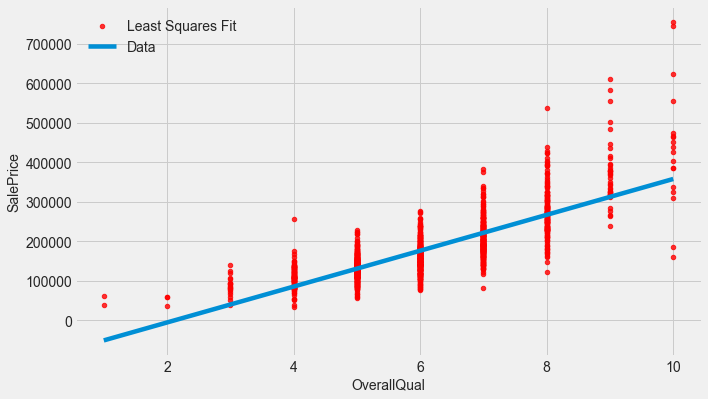

In [23]:
ax = sns.regplot(data=df, x='OverallQual', y='SalePrice', ci=None, scatter_kws={'color':'r', 's':20})
ax.legend(['Least Squares Fit', 'Data'])

In [26]:
# Define X and y
X = df['OverallQual'].values.reshape(-1, 1)
y = df['SalePrice'].values

# Fit linear regressions
reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_)

-96206.07951476038
[45435.8025931]


## Linear Regression - Multivariate

In [6]:
model_lin = sm.OLS.from_formula("SalePrice ~ OverallQual + GarageArea", data=df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1495.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:34:26   Log-Likelihood:                -17729.
No. Observations:                1460   AIC:                         3.546e+04
Df Residuals:                    1457   BIC:                         3.548e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.067e+04   5400.290    -16.790      0.000   -1.01e+05   -8.01e+04
OverallQual  3.699e+04   1041.328     35.526      0.000     3.5e+04     3.9e+04
GarageArea     97.1547      6.736     14.424      0.000      83.942     110.368
==============================================================================
Omnibus:                      682.002   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9360.943
Skew:                           1.813   Prob(JB):                         0.00
Kurtosis:                      14.863   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Logistic Regression
A type of generalized linear model which is used for classification problems

## Logistic Regression - Univariate

In [7]:
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df2 = pd.read_csv(url)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
model = sm.GLM.from_formula("Survived ~ Age", family=sm.families.Binomial(), data=df2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -480.11
Date:                Sun, 03 Jul 2022   Deviance:                       960.23
Time:                        14:34:27   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.005987
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0567      0.174     -0.327      0.744      -0.397       0.283
Age           -0.0110      0.005     -2.057      0.040      -0.021      -0.001
==============================================================================
"""

the P>|t| result above, we can conclude that the variable 'Age' is an important predictor for 'Survived', as the value is less than 0.05.

In [9]:
model = sm.GLM.from_formula("Survived ~ Age + Sex", family=sm.families.Binomial(), data=df2)
result = model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      711
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -374.98
Date:                Sun, 03 Jul 2022   Deviance:                       749.96
Time:                        14:34:27   Pearson chi2:                     713.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2596
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2773      0.230      5.549      0.000       0.826       1.728
Sex[T.male]    -2.4659      0.185    -13.302      0.000      -2.829      -2.103
Age            -0.0054      0.006     -0.860      0.390      -0.018       0.007
===============================================================================
"""